# OpenCV Part 2

In [1]:
import warnings
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
imagedata = plt.imread("data/skincancer.jpg")
print("Image Properties :")
print("Image Height : {},\nImage Width : {},\nImage Channel : {}".format(imagedata.shape[0],imagedata.shape[1],imagedata.shape[2]))
print("Image Size : ", imagedata.size)

Image Properties :
Image Height : 222,
Image Width : 294,
Image Channel : 3
Image Size :  195804


In [3]:
#Image Show Function 
def imageShow(image_title, image):
    image_data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(image_data)
    plt.title(image_title)
    plt.grid(False)
    plt.show()

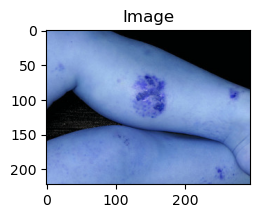

In [4]:
imageShow("Image",imagedata)

# Part 2
## Histogram
##  Types of Blur

- Histograms are a powerful tool for analyzing and processing images in OpenCV, and they are used extensively in many different applications.
- Steps
  - Histogram In Histogram Split Image Chennel Using cv.split() 
  - Than Make a combination variable using tuple beacuse it canot change in future work 
  - make a loop for show histogram using zip for combain variable 
  - for histogram use cv2.calcHist
  - use xlim[0, 256]


In [5]:


def imageHistogram(imageTitle, image, mask = False):
    color_channel = cv2.split(image)
    color_com = ('b', 'g', 'r')
    plt.figure(figsize=(4,2))
    plt.title(imageTitle)
    plt.xlabel("Bins")
    plt.ylabel("Pixel Information")
    
    for(color_channel, color_com) in zip(color_channel, color_com):
        histogram = cv2.calcHist([color_channel],[0], None, [256],[0,256])
        plt.plot(histogram, color = color_com)
        plt.xlim([0,256])
        plt.show()
    

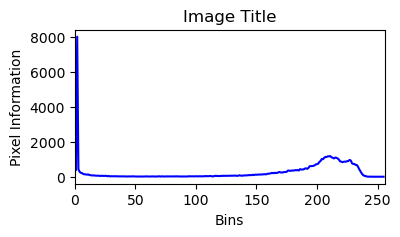

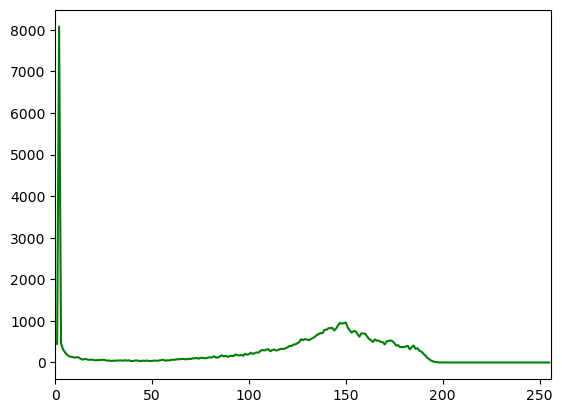

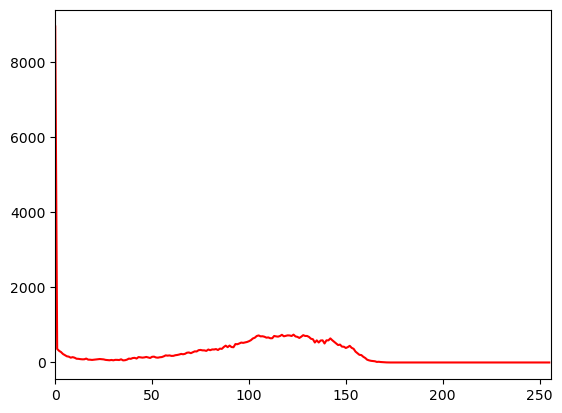

In [6]:
imageHistogram("Image Title",imagedata)

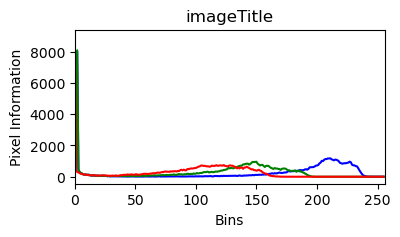

In [7]:
color_Channel = cv2.split(imagedata)
color_com = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (color_Channel, color_com) in zip(color_Channel, color_com):
    histogram = cv2.calcHist([color_Channel], [0],None, [256], [0, 256])
    plt.plot(histogram, color = color_com)
    plt.xlim([0, 256])

#####    Histograms are commonly used to show the correlation between different color channels in 
      an image because they provide a visual representation of the distribution of pixel intensities for each channel. By              comparing the histograms for different color channels, we can get an idea of how much overlap there is between the             different color channels, and we can identify any patterns or trends that might be present.

Image Shape: (32, 32) with 1024


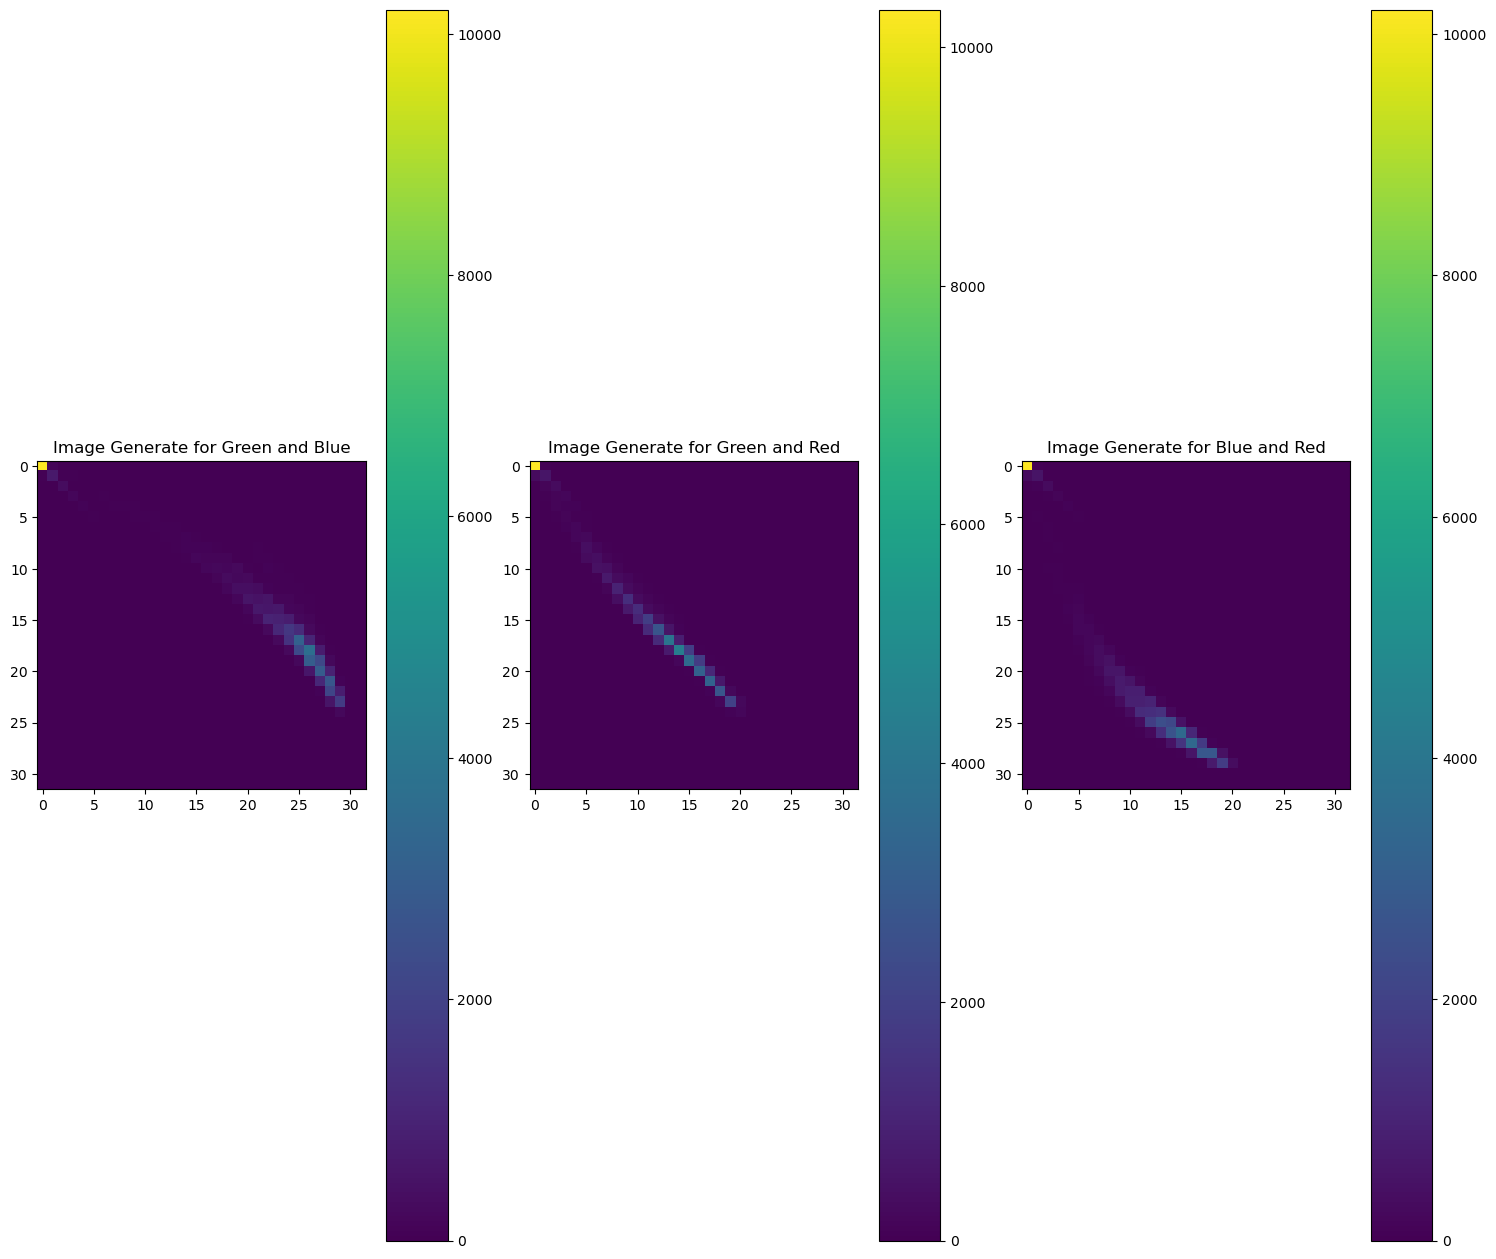

In [8]:
color_Channel = cv2.split(imagedata)
color = ["b", "g", "r"]
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(131)
hist = cv2.calcHist([color_Channel[1], color_Channel[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Green and Blue")
plt.colorbar(p)
#corelation 

ax = fig.add_subplot(132)
hist = cv2.calcHist([color_Channel[1], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Green and Red")
plt.colorbar(p)



ax = fig.add_subplot(133)
hist = cv2.calcHist([color_Channel[0], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Blue and Red")
plt.colorbar(p)

#Flatten Layer use single dimention
print("Image Shape: {} with {}".format(hist.shape, hist.flatten().shape[0]))

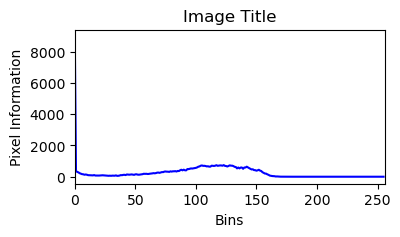

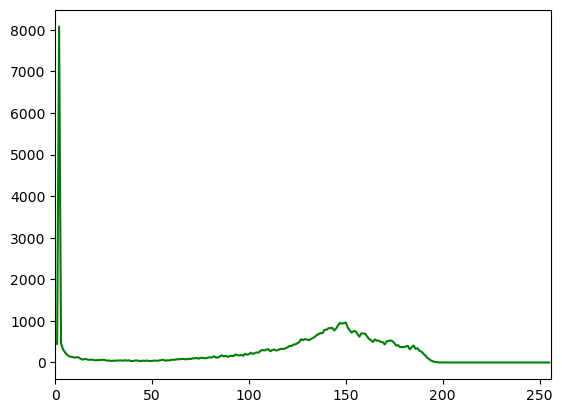

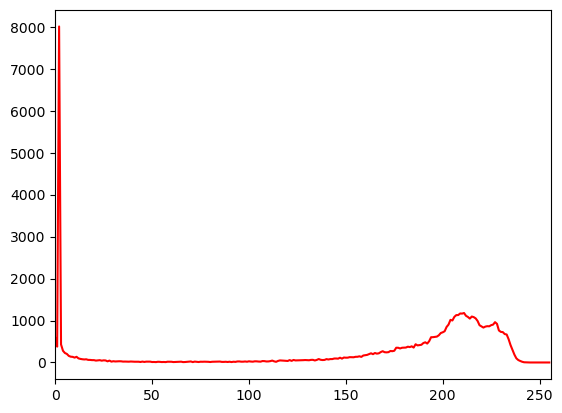

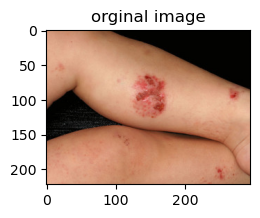

In [9]:
image = cv2.imread("data/skincancer.jpg")
imageHistogram("Image Title",image)
imageShow("orginal image", image)

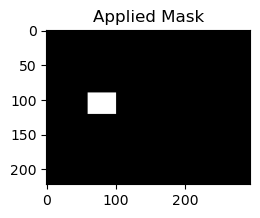

In [10]:
mask = np.zeros(imagedata.shape[:2], dtype= "uint8")
cv2.rectangle(mask, (60, 90), (100, 120), 255, -1)
imageShow("Applied Mask", mask)

#### the Gaussian blur function is often used to reduce image noise and smooth out the image. The function works by convolving the image with a Gaussian kernel, which is a type of filter that emphasizes low-frequency components of the image and suppresses high-frequency components.

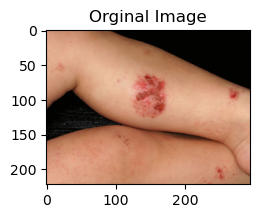

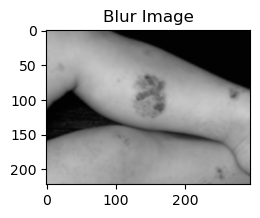

In [11]:
#Convart BRG to GRAY color
#use GaussainBLur for blue 
image = cv2.imread("data/skincancer.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurImage = cv2.GaussianBlur(gray, (5, 5), 0)
imageShow("Orginal Image", image)
imageShow("Blur Image", blurImage)

####   The Canny edge detection algorithm is a powerful tool for detecting edges in images and is widely used in many different computer vision applications. It provides accurate and tunable edge detection, is computationally efficient, and can be used as a preprocessing step for other algorithms.

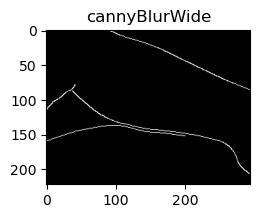

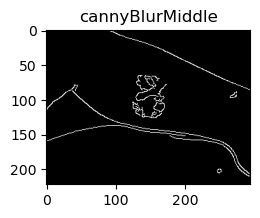

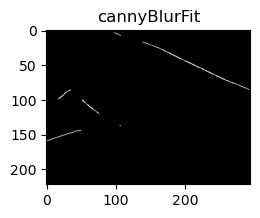

In [12]:
cannyBlurWide = cv2.Canny(blurImage, 20, 250)
cannyBlurMiddle = cv2.Canny(blurImage, 15, 120)
cannyBlurFit = cv2.Canny(blurImage, 240, 250)

imageShow("cannyBlurWide",cannyBlurWide)
imageShow("cannyBlurMiddle", cannyBlurMiddle)
imageShow("cannyBlurFit", cannyBlurFit)